In [1]:
from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
from tifffile import TiffFile
from AutomatedCellAnalysis.get_cell_image import get_cell_image

In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\thinkBookUser\Anaconda3\envs\pde_screening\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor 

In [2]:
def fit_function(x, f):
    a = f['start(ns)']
    b = f['range(ns)']
    c = f['midpoint(s)']
    d = f['breakdown time(s)']
    return a + b / (1 + np.exp(-4 * (x - c)/d))

In [3]:
pth = Path('C:\\Users\\thinkBookUser\\Desktop\\Screening_Data_Analyzed\\2019\\12\\05\\caged\\results')
well = 'D07'
N=92 # highlighted cell nr. 92
fit = pd.read_csv(Path(pth,well+'_fit.csv')).set_index('Unnamed: 0')
fit.rename(columns={"breakdown_time(s)": "breakdown time(s)"}, inplace="true")
tau = np.genfromtxt(Path(pth,well+'_tau.csv'), delimiter='\t')
datashape = tau.shape
frameinterval = 2
errorstart = 15
time = np.arange(0, datashape[1] * frameinterval, frameinterval)

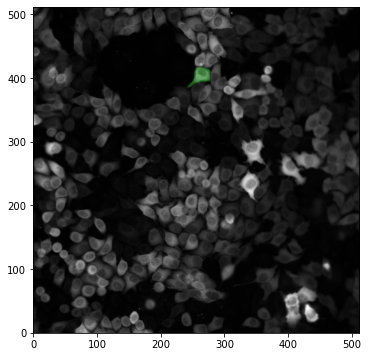

In [4]:
title = 'Figure 3A'
fig = plt.figure(figsize = (6, 6))
labelmapfile = Path('C:\\Users\\thinkBookUser\\Desktop\\Screening_Data_Analyzed\\2019\\12\\05\\caged\\intensity_data\\C07_I_mean_labelmap.tif')
meanfile = Path('C:\\Users\\thinkBookUser\\Desktop\\Screening_Data_Analyzed\\2019\\12\\05\\caged\\intensity_data\\C07_I_mean.tif')
highlighted_ROI = get_cell_image(labelmapfile, meanfile,N)
plt.imshow(highlighted_ROI,extent=[0,512,0,512])
#fig.savefig(Path('C:\\Users\\thinkBookUser\\Desktop', title+'.svg',dpi=600))

(2.41, 3.19)

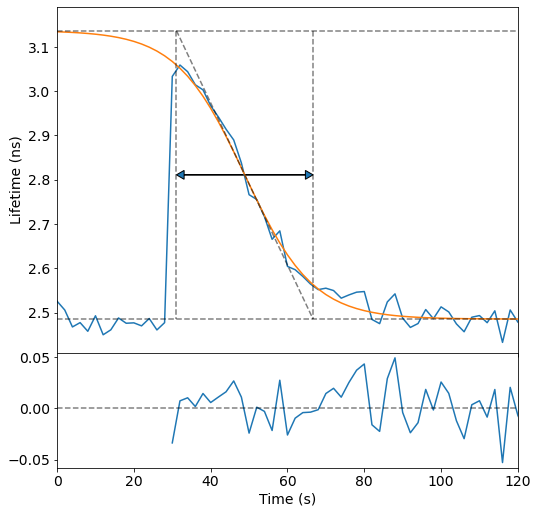

In [14]:
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
fig = plt.figure(figsize=(8, 8))
axs = [fig.add_axes([0.1, 0.3, 0.8, 0.6]),
       fig.add_axes([0.1, 0.1, 0.8, 0.2])]
axs[0].plot(time, tau[N])
axs[0].plot(time, fit_function(time, fit.iloc[N]))
upperbound = fit.iloc[N]['start(ns)']
axs[0].plot(time, np.repeat(upperbound, datashape[1]),'--k', alpha=0.5)
lowerbound = fit.iloc[N]['start(ns)']+fit.iloc[N]['range(ns)']
axs[0].plot(time, np.repeat(lowerbound, datashape[1]),'--k', alpha=0.5)
t_mid = fit.iloc[N]['midpoint(s)']
t_min = t_mid-fit.iloc[N]['breakdown time(s)']/2
t_max = t_mid+fit.iloc[N]['breakdown time(s)']/2
axs[0].plot([t_min, t_max], [upperbound,lowerbound],'--k', alpha=0.5)
axs[0].plot([t_min, t_min], [upperbound,lowerbound],'--k', alpha=0.5)
axs[0].plot([t_max, t_max], [upperbound,lowerbound],'--k', alpha=0.5)
axs[0].arrow(t_mid, (upperbound+lowerbound)/2, 
             fit.iloc[N]['breakdown time(s)']/2, 0,
             length_includes_head = True,
             head_width = 0.02,
             head_length = 2)
axs[0].arrow(t_mid, (upperbound+lowerbound)/2, 
             -fit.iloc[N]['breakdown time(s)']/2, 0,
             length_includes_head = True,
             head_width = 0.02,
             head_length = 2)
axs[0].set(xticklabels=[])
error = tau[N]-fit_function(time, fit.iloc[N])
error[0:errorstart] = np.nan
axs[1].plot(time, error)
axs[1].plot(time, np.repeat(0, datashape[1]),'k--', alpha=0.5)
axs[0].set_ylabel('Lifetime (ns)')
axs[1].set_xlabel('Time (s)')
axs[0].set_xlim([0,120])
axs[1].set_xlim([0,120])
axs[0].set_ylim([2.41,3.19])